# Exploring Phenol and Proline Content Differences in Italian Wine Cultivars

Group 26: Tamara Nammao, Yilin Long, Sahil Vashist

In [1]:
### Loading necessary libraries needed to tidy and wrangle our dataset. 
library(tidyverse)
library(repr)
library(infer)
library(tidymodels)
library(broom)
options(repr.matrix.max.rows = 6)



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.1     ✔ rsample      1.1.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ modeldata    1.0.1     ✔ workflows    1.0.0
✔ parsnip      1.0.1     ✔ workflowsets 1.0.0
✔ recipes      1.0.1     ✔ yardstick    1.1.0

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipe

# INTRODUCTION

Italy, renowned for its rich winemaking heritage, boasts a diverse range of grape cultivars that contribute to the creation of distinctive and exquisite wines. In the pursuit of excellence, one of the pivotal components under scrutiny is the composition of phenols and proline in the wine, as they play a crucial role in shaping its characteristics.
The presence of phenolic compounds in wine, particularly total phenols, is known to contribute to its color, taste, and mouthfeel. Moreover, proline, an amino acid, is acknowledged for its potential role in enhancing the overall stability and flavor profile of wines. 
Thus, the primary objective of this report is to investigate whether there exists a significant difference in the mean total phenols content and the standard deviation of proline content among wines sourced from three distinct grape cultivars in the enchanting region of Italy. 
The dataset we get from https://archive.ics.uci.edu/dataset/109/wineThese determined the quantities of 13 constituents found in each of the three types of wines. We need to filter out NA and it will not harm our results because the dataset is large enough it has a variety of different points and taking out certain ones won't drastically change it. We only need two of those random variables, so we will select the column total_phenols(mg/cm^3) and proline (mg/cm^3)
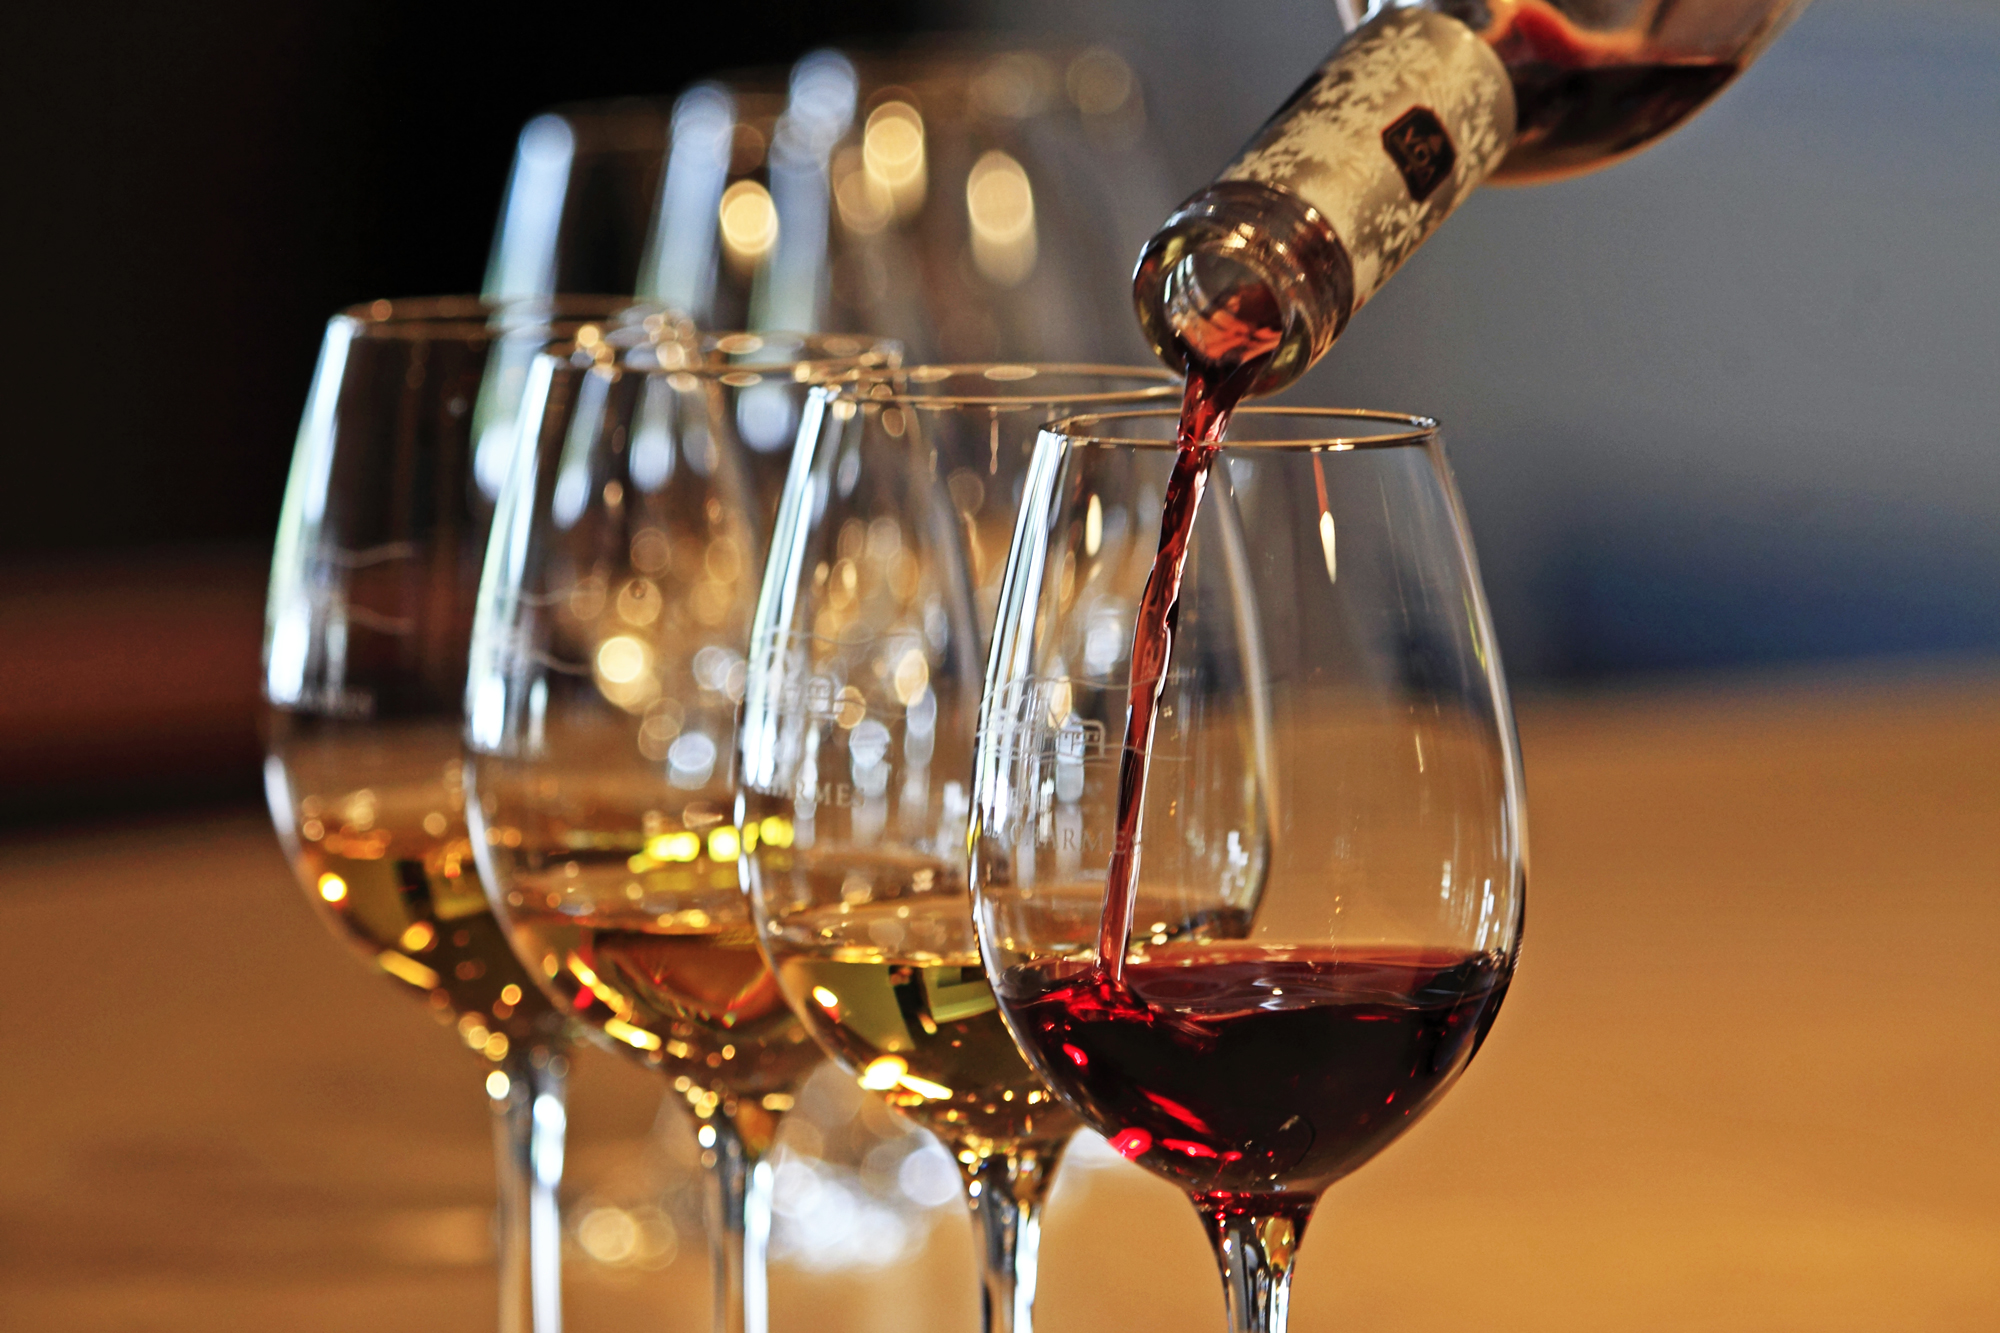

# Question
**Is there a significant difference in the mean and standard deviation of the total phenol content and the total proline content among wines from two different cultivars in the region of Italy?**

There are no existing studies as references since the actual names of cultivars are unknown.


In [2]:
#Prelimnary Results
#Demonstrate that the dataset can be read from the web into R.
#Clean and wrangle your data into a tidy format.
#Plot the relevant raw data, tailoring your plot in a way that addresses your question.
#Compute estimates of the parameter you identified across your groups. Present this in a table. If relevant, include these estimates in your p

In [3]:
set.seed(2000)
#opening dataset
dataset <- read.csv("https://raw.githubusercontent.com/lyl1220/Stat201_Project/main/wine.data")
#renaming columns 
colnames(dataset) <- c("class", "alchol", "malic_acid", "ash", "alcalinity_of_ash", "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols", "proanthocyanins",
           "color_intensity", "hue", "D280_diltued_wines", "proline")
dataset


class,alchol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,D280_diltued_wines,proline
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [4]:
#cleaning data and selecting/

clean_data <- dataset |>
    select(class, total_phenols, proline) |>
    filter(!is.na(total_phenols))|> # we have removed the NA values, thus the data won't have any missing value
    filter(!is.na(proline))|>
    filter(class == 1 | class == 2)

clean_data

class,total_phenols,proline
<int>,<dbl>,<int>
1,2.65,1050
1,2.80,1185
1,3.85,1480
⋮,⋮,⋮
2,2.13,466
2,2.22,342
2,2.10,580


In [5]:
#turning class into a factor
clean_data$class <- as.factor(clean_data$class)

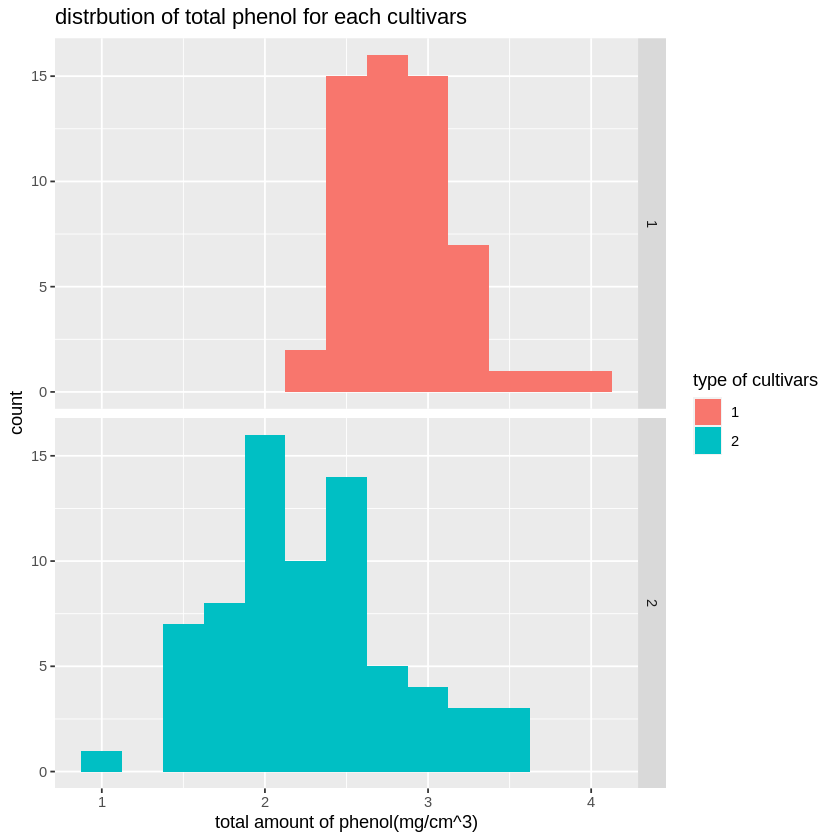

In [6]:

#plotting raw data 
clean_data_total_phenols <- clean_data |>
    ggplot() +
    geom_histogram(aes(x = total_phenols,fill=class), binwidth = 0.25) +
    facet_grid(class~.)+
    labs( x = "total amount of phenol(mg/cm^3)", fill = "type of cultivars") +
    ggtitle( "distrbution of total phenol for each cultivars")
clean_data_total_phenols



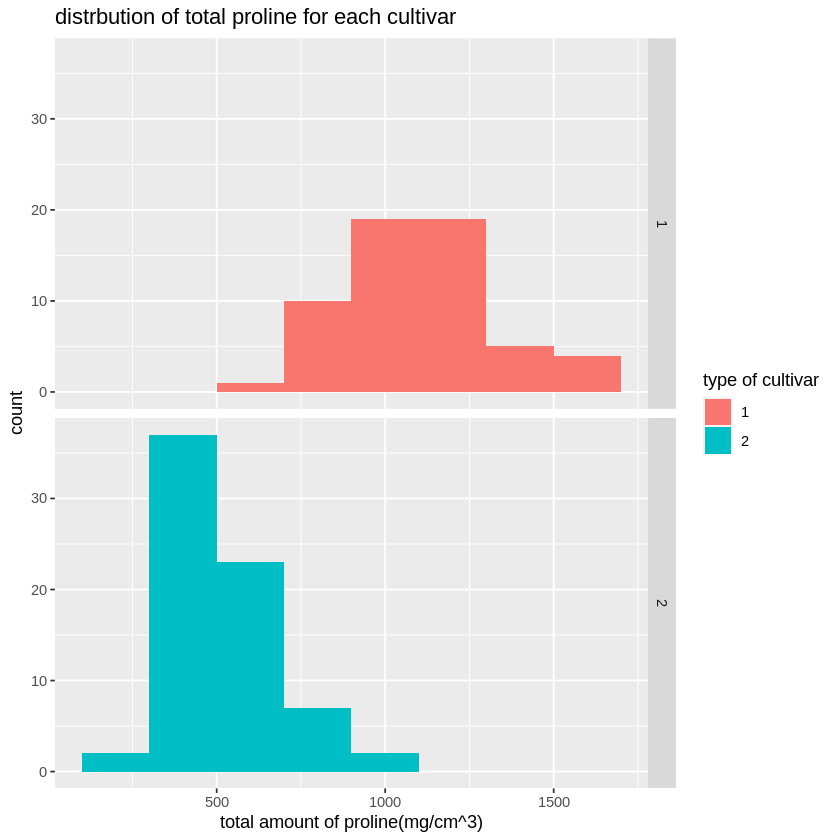

In [7]:
clean_data_proline <- clean_data |>
    ggplot() +
    geom_histogram(aes(x = proline, fill = class), binwidth =200) +
    facet_grid(class~.)+
    labs( x = "total amount of proline(mg/cm^3)", fill = "type of cultivar") +
    ggtitle( "distrbution of total proline for each cultivar")
clean_data_proline


In [8]:
#finding the mean and sd
wine_data <- clean_data |>
    group_by(class) |>
    summarize(mean_total_phenols = mean(total_phenols), sd_phenol=sd(total_phenols) ,mean_total_proline = mean(proline), sd_proline = sd(proline)) 
wine_data

class,mean_total_phenols,sd_phenol,mean_total_proline,sd_proline
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,2.840862,0.3418797,1116.586,223.3528
2,2.258873,0.5453611,519.507,157.2112


# Hypothesis Testing

We are investigating whether there is a difference in the mean total phenols content and the proline content among wines from 2 different cultivars.

**Phenol content**


Null Hypothesis (H0): There is no significant difference in the mean total phenols content content between wines from cultivar 1 and cultivar 2 in the region of Italy.

μ1 - μ2 = 0

Alternative Hypothesis (HA): There is a significant difference in the mean total phenols content between wines from cultivar 1 and cultivar 2 in the region of Italy.

μ1 - μ2 $\neq$ 0


**Proline content**


Null Hypothesis (H0): There is no significant difference in the mean total proline content content between wines from cultivar 1 and cultivar 2 in the region of Italy.

μ1 - μ2 = 0

Alternative Hypothesis (HA): There is a significant difference in the mean total proline content between wines from cultivar 1 and cultivar 2 in the region of Italy.

μ1 - μ2 $\neq$ 0




Our report is trustworthy because we will use both asymptotically and bootstraps method. Our samples are sufficiently large. We've also set the seed, making our report reproducible. 

We intend to explore this using hypothesis testing. Since we have 2 samples from 2 independent cultivatars, we'll use 2-sample z-testing. We'll also construct a 90% confidence interval of the difference in means and check if it contains 0.

We'll use a significance level of 10% (rather than 5%) because we feel like a type 2 error would be worse than a type 1 error in our report.


## Hypothesis testing for Difference in Mean of Total Phenol content:

### 1) Bootstrap Method:

##### Calculating the Test Statistic

In [9]:
obs_diff_mean_phenol <- clean_data |>
  specify(total_phenols ~ class) |>
  calculate(stat = "diff in means", order = c("1", "2"))
obs_diff_mean_phenol

stat
<dbl>
0.5819888


In [24]:
null_distribution_phenol <- clean_data |>
  specify(formula = total_phenols ~ class) |> 
  hypothesize(null = "independence") |>
  generate(reps = 1000, type = "bootstrap") |>
  calculate(stat = "diff in means", order = c("1", "2"))
null_distribution_phenol


replicate,stat
<int>,<dbl>
1,0.5335821
2,0.5823635
3,0.6056099
⋮,⋮
998,0.4710750
999,0.5098088
1000,0.5698377


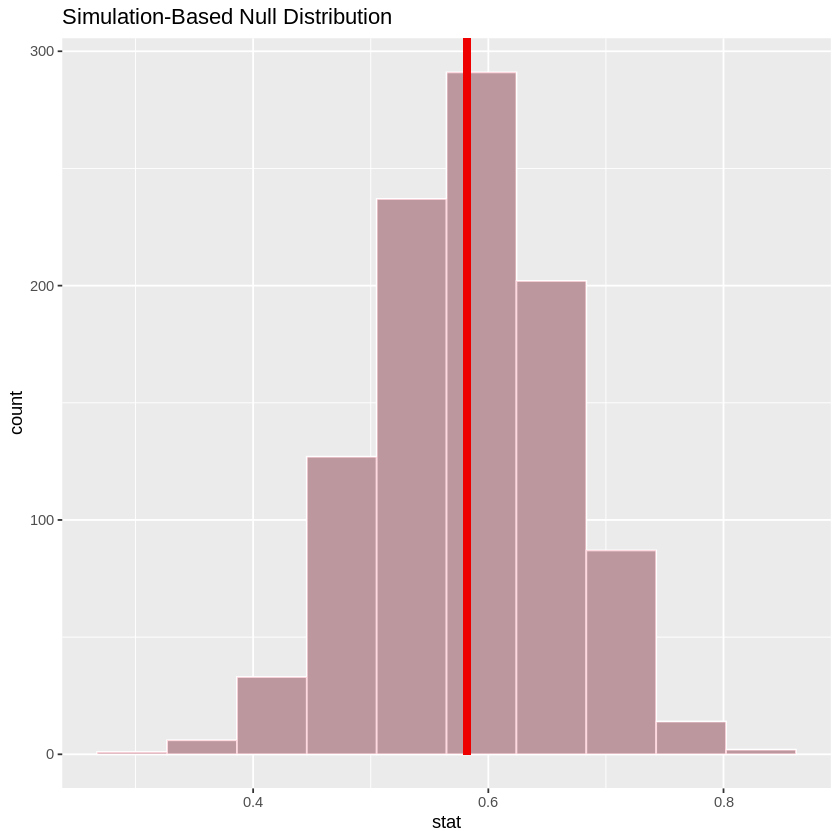

In [25]:
visualize(null_distribution_phenol, bins = 10) + 
  shade_p_value(obs_stat = obs_diff_mean_phenol, direction = "both")


In [26]:
null_distribution_phenol |>
  get_p_value(obs_stat = obs_diff_mean_phenol, direction = "both")

p_value
<dbl>
0.982


##### Looking at SD

In [13]:
null_distribution_phenol_sd <- sd(null_distribution_phenol$stat)
null_distribution_phenol_sd

[1] 0.07932668

#### 2) CLT Method

In [14]:
# Obtain sample mean for group 1
cultivar_1 <- 
    clean_data %>% 
    filter(class == '1') %>% 
    pull(total_phenols)

# Obtain sample mean for group 2
cultivar_2 <- 
    clean_data %>% 
    filter(class == '2') %>% 
    pull(total_phenols)

# Obtain 90% CI for difference in means
phenol_diff_means_ci <- 
    tibble(
        lower_ci = mean(cultivar_1) - mean(cultivar_2) - qnorm(1-(0.1/2)) * sqrt(var(cultivar_1)/length(cultivar_1) + var(cultivar_2)/length(cultivar_2)),
        upper_ci = mean(cultivar_1) - mean(cultivar_2) + qnorm(1-(0.1/2)) * sqrt(var(cultivar_1)/length(cultivar_1) + var(cultivar_2)/length(cultivar_2))
    )
phenol_diff_means_ci

lower_ci,upper_ci
<dbl>,<dbl>
0.4524291,0.7115486


And our test statistics is 0.58198.
Therefore it lies in the fail to reject region

## Hypothesis testing for Difference in Mean of Proline content:

### 1) Bootstrap Method:

##### Calculating the Test Statistic

In [15]:
obs_diff_mean_proline <- clean_data |>
  specify(proline ~ class) |>
  calculate(stat = "diff in means", order = c("1", "2"))
obs_diff_mean_proline

stat
<dbl>
597.0792


In [16]:
null_distribution_proline <- clean_data |>
  specify(formula = proline ~ class) |> 
  hypothesize(null = "independence") |>
  generate(reps = 1000, type = "bootstrap") |>
  calculate(stat = "diff in means", order = c("1", "2"))
null_distribution_proline

replicate,stat
<int>,<dbl>
1,608.3090
2,530.8966
3,631.0169
⋮,⋮
998,587.8238
999,588.1782
1000,598.2226


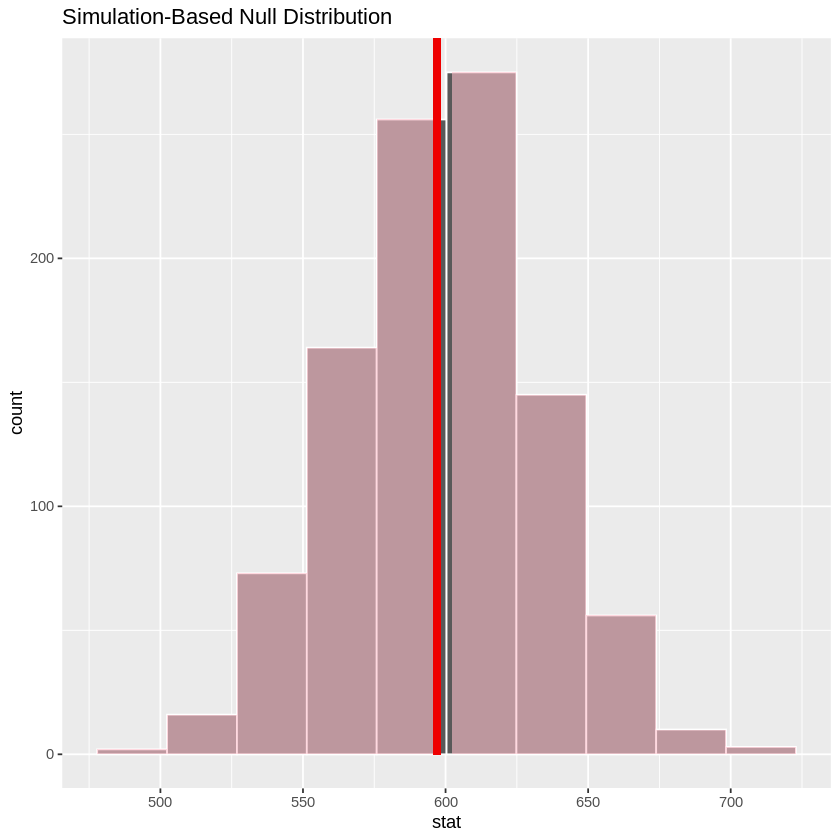

In [17]:
visualize(null_distribution_proline, bins = 10) + 
  shade_p_value(obs_stat = obs_diff_mean_proline, direction = "both")

In [18]:
null_distribution_proline |>
  get_p_value(obs_stat = obs_diff_mean_proline, direction = "both")

p_value
<dbl>
0.93


##### Looking at SD

In [19]:
null_distribution_proline_sd <- sd(null_distribution_proline$stat)
null_distribution_proline_sd

[1] 34.39869

### 2) CLT Method

In [20]:
# Obtain sample mean for group 1
cultivar_1 <- 
    clean_data %>% 
    filter(class == '1') %>% 
    pull(proline)

# Obtain sample mean for group 2
cultivar_2 <- 
    clean_data %>% 
    filter(class == '2') %>% 
    pull(proline)

# Obtain 90% CI for difference in means
proline_diff_means_ci <- 
    tibble(
        lower_ci = mean(cultivar_1) - mean(cultivar_2) - qnorm(1-(0.1/2)) * sqrt(var(cultivar_1)/length(cultivar_1) + var(cultivar_2)/length(cultivar_2)),
        upper_ci = mean(cultivar_1) - mean(cultivar_2) + qnorm(1-(0.1/2)) * sqrt(var(cultivar_1)/length(cultivar_1) + var(cultivar_2)/length(cultivar_2))
    )
proline_diff_means_ci

lower_ci,upper_ci
<dbl>,<dbl>
539.9051,654.2533


Our test statistics is 597.0792 and it lies in the fail to reject region.


# Methods
### What do you expect to find?

Based on the research question, variations in both the mean total phenols content and the standard deviation of proline content among wines from three different cultivars in Italy are expected. Different cultivars may have distinct genetic profiles.

For example, some cultivars might have higher levels of total phenols, which are known for their antioxidant properties and contribute to the wine's color, taste, and aging potential. On the other hand, the standard deviation of proline content might indicate the degree of consistency or variability in the proline levels, which is an amino acid that can influence wine quality and stability.


### What impact could such findings have?
It can guide them in selecting the most suitable cultivars for specific wine styles, optimizing vineyard management practices, and improving overall wine quality.


The variations in phenolic compounds and proline content could also impact how wines are marketed and perceived by consumers. Wines with unique profiles might appeal to specific consumer preferences, leading to targeted marketing strategies.


The findings will highlight the unique characteristics of wines from the region of Italy.


### What future questions could this lead to?
**Influence of Environment:** Understanding the variations in wine characteristics among cultivars could lead to questions about how different environmental factors (terroir) influence phenolic compounds and amino acids in the grapes and wines.

**Effect of Winemaking Techniques:** Future studies might investigate the impact of different winemaking techniques on phenolic compounds and proline content in wines, allowing winemakers to optimize their practices.

Overall, this research has the potential to inspire numerous investigations that can contribute to the wine industry's advancement and provide valuable insights into the complexities of grape and wine composition.



# Results
## Mean of Total Phenol Content:
#### Bootstrap Method
We calculated the observed difference in means of the total phenol content between the two cultivars and found it to be approximately 0.582. Through the bootstrap method with 1000 replicates, we generated a null distribution of differences in means under the assumption of no difference. The resulting p-value was approximately 0.992, 0.992>0.1, indicating that we lack sufficient evidence to reject the null hypothesis. 

#### CLT Method
Applying the Central Limit Theorem, we computed the 90% confidence interval for the difference in means of total phenol content as [0.452, 0.712], and 0.582 lies between this interval. This interval further reinforces our finding that there is no significant difference between the two cultivars.

## Mean of Proline Content:
#### Bootstrap Method
For proline content, the observed difference in means between the two cultivars was approximately 597.079. Employing the bootstrap method with 1000 replicates, we generated a null distribution and obtained a p-value of approximately 0.93, 0.93>0.1. This result suggests that we lack evidence to reject the null hypothesis, indicating no significant difference. 

#### CLT Method
Using the Central Limit Theorem, we calculated the 90% confidence interval for the difference in means of proline content as [539.905, 654.253], and 597.079 lies between this interval. This interval aligns with our findings from the bootstrap method, indicating no significant difference between the two cultivars.

### Conclusion:
Based on the results obtained from both the Bootstrap method and the CLT method, we conclude that there is no statistically significant difference in the mean total phenol and proline content between wines from the two cultivars in the region of Italy. The p-values and confidence intervals consistently support the conclusion of no difference. These findings provide valuable insights for the wine industry in understanding the chemical composition of wines from different cultivars.

## Comparing Standard Deviation's:
 In our comparative analysis of two wine cultivators, focusing on the difference of means for both phenol and proline levels, we observed intriguing variations in their standard deviations. The bootstrap sampling technique revealed that the standard deviation for phenol levels between the two cultivators was remarkably low, measuring at 0.0793. This suggests a consistent and tight distribution of phenol measurements around the mean difference, indicating a relatively uniform disparity between the cultivators. In contrast, the standard deviation for proline levels exhibited substantial variability, recording a value of 34.3987. This higher standard deviation implies a wider spread of proline measurements around the mean difference, indicating a more diverse range of contrasts between the two cultivators in terms of proline content. In summary, while phenol levels displayed a relatively stable difference of means, the proline levels showcased a greater dispersion, underscoring potential disparities in the proline content between the two wine cultivators.

## Compare Bootstrapping and Asymptotic Methods:

#### Bootstrapping
Bootstrapping is a non-parametric resampling technique that doesn't rely on distribution assumptions. It's especially useful when the sample size is small, the data distribution is unknown, or when data exhibits non-normality. 

#### Asymptotic Methods (CLT)
Asymptotic methods, like the Central Limit Theorem, assume a sufficiently large sample size and can rely on distributional assumptions. They are powerful when sample sizes are large and when the data distribution is approximately normal.

#### Which is better
Both are good in our case. In our case, both methods yielded similar results because our sample size was likely sufficiently large, and the assumptions of the CLT were reasonably met. This led to convergence of the sample mean distribution to a normal distribution. As a result, the findings from both methods aligned, indicating no significant differences in mean phenol and proline content between the cultivars.

# Discussion

Our analysis aimed to determine if there are differences in mean total phenol and proline content between wines from two cultivars in Italy. Both the Bootstrap and CLT methods consistently led to the conclusion that no significant differences exist for either compound between the two cultivars. This suggests that these specific chemical components do not significantly differentiate the wines.

The result is exactly what we expected, since we set our null hypothesis and assume the means are the same.

Future Research:
This study opens doors for further exploration. Future research could delve into other chemical compounds that may differentiate wines, considering factors beyond cultivar, such as terroir, climate, and winemaking practices. Moreover, investigating the relationship between these compounds and sensory attributes could enhance our understanding of wine quality perception.

In conclusion, our study contributes to the understanding of wine composition and offers insights for future research avenues, potentially unraveling more nuanced factors that influence wine characteristics.

# References

Aeberhard,Stefan and Forina,M.. (1991). Wine. UCI Machine Learning Repository. https://doi.org/10.24432/C5PC7J.

Merkytė, Vakarė, et al. “Phenolic Compounds as Markers of Wine Quality and Authenticity.” Foods (Basel, Switzerland), 1 Dec. 2020, www.ncbi.nlm.nih.gov/pmc/articles/PMC7760515/. 

Wineaustralia. “Amino Acids Contribute to Desirable Sensory Attributes in Red Wine.” Wine Australia, 26 Aug. 2022, www.wineaustralia.com/news/articles/amino-acids-contribute-to-desirable-sensory-attributes-in-red-wine. 

Kavi Kishor, Polavarapu B, et al. “Role of Proline in Cell Wall Synthesis and Plant Development and Its Implications in Plant Ontogeny.” Frontiers in Plant Science, 20 July 2015, www.ncbi.nlm.nih.gov/pmc/articles/PMC4507145/. 